# A/B Hypothesis Testing for Ad campaign performance 

## Data Exploration

In [1]:
# import all packages
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#load data
df = pd.read_csv('../data/AdSmartABdata.csv')

In [4]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [5]:
# Converting date object to panda datatime
pd.set_option('display.max_rows', None)
df['date']=pd.to_datetime(df['date'])

In [6]:
len(df['device_make'].value_counts())

270

In [7]:
#print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   auction_id   8077 non-null   object        
 1   experiment   8077 non-null   object        
 2   date         8077 non-null   datetime64[ns]
 3   hour         8077 non-null   int64         
 4   device_make  8077 non-null   object        
 5   platform_os  8077 non-null   int64         
 6   browser      8077 non-null   object        
 7   yes          8077 non-null   int64         
 8   no           8077 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 568.0+ KB


In [8]:
 # number of unique  values in each vriable
df.nunique().sort_values(ascending=False)

auction_id     8077
device_make     270
hour             24
browser          15
date              8
platform_os       3
experiment        2
yes               2
no                2
dtype: int64

In [9]:
# checking for missing values
df.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [10]:
# the data which contain those who has answered the questionnaire
df_answered= df[np.logical_or(df['yes']==1,df['no']==1)]
df_answered.shape 

(1243, 9)

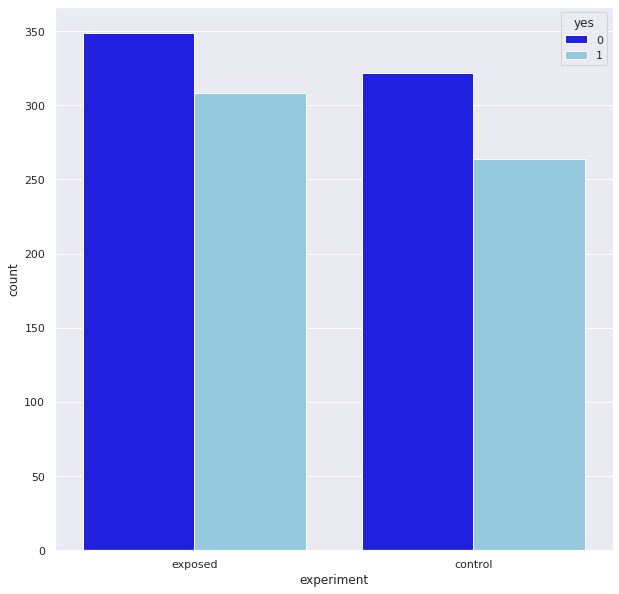

In [11]:

plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="experiment", palette=["blue", "skyblue"], data=df_answered, hue='yes')

**NB:**
- The above figure shows us the distribution of the answers of the BIO(brand impact optimizer) for the users who are under the exposed and control group. 


**In both groups of the experiment, the number of people who said no is higher than the number of people who said yes.** 




In [12]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    sns.displot(data=df, x=column, color=color, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.xticks(rotation=90)
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

In [13]:
#Value of users who said yes, no and not replied
df.groupby('yes')['no'].value_counts()

yes  no
0    0     6834
     1      671
1    0      572
Name: no, dtype: int64

#### Users with answer 'yes' = 572

#### Users with answer 'no' = 672

#### Users with out reply = 6834

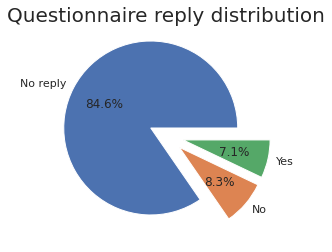

In [14]:
user_reply = df.groupby('yes')['no'].value_counts().tolist()
name = ['No reply','No','Yes']
exp = [0.2,0.2,0.2]
plt.pie(user_reply, labels=name ,explode=exp,autopct ='%2.1f%%')
plt.title('Questionnaire reply distribution', fontsize = 20)
plt.show()

#### From the above pie chart,We can see that:- 
       * No reply domainates the dataset.
       * Users that replied with a No are greater than Users who replied with a yes.

In [15]:
y = df.groupby('browser')

In [16]:

df['browser'].value_counts()

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Opera Mobile                     3
Chrome                           3
Pinterest                        3
Opera Mini                       1
Edge Mobile                      1
Firefox Mobile                   1
Puffin                           1
Android                          1
Name: browser, dtype: int64

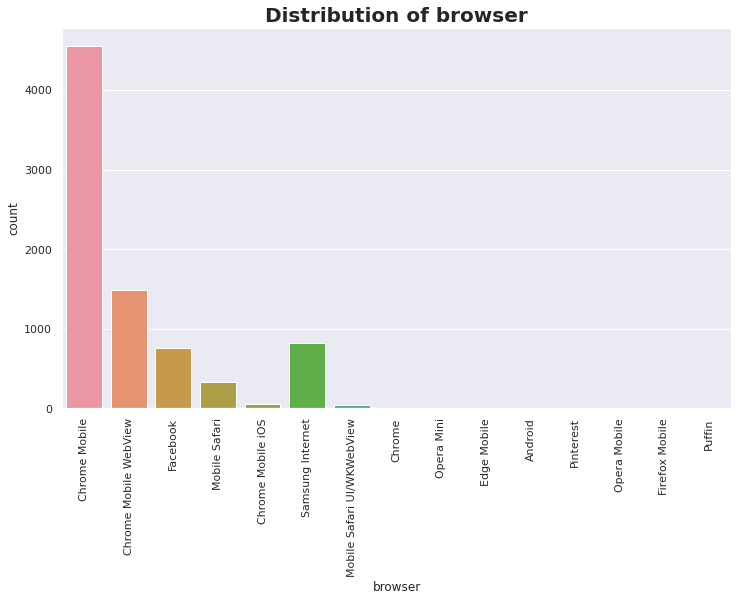

In [17]:
plot_count(df, "browser")

#### The widely used browser is chrome Mobile.

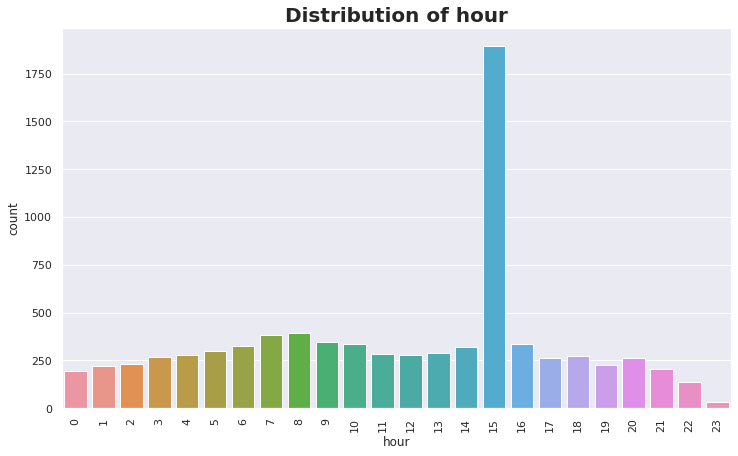

In [18]:
plot_count(df, "hour")

#### From the above plot we can see that maximum frequence hour  is 15 and the minimum is 23.

In [19]:
df['platform_os'].value_counts()

6    7648
5     428
7       1
Name: platform_os, dtype: int64

In [20]:
# total number of device 
len(df['device_make'].value_counts())

270

In [21]:
df.experiment.value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

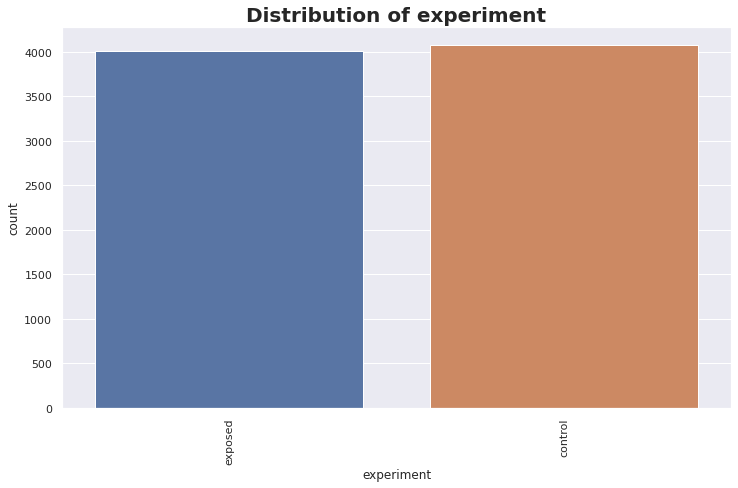

In [22]:
plot_count(df, 'experiment')

#### The control group is greater than the exposed group by 65 counts